In [1]:
# ! ls
# ! pip install --upgrade tensorflow==2.1.*
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

In [0]:
from __future__ import print_function , division
from builtins import range , input

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet50V2 , preprocess_input , decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import glob 
%matplotlib inline

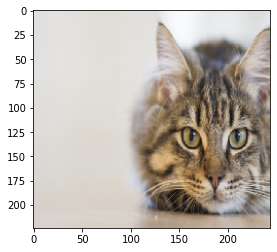

In [0]:
image_size = (224,244,3)
imgfiles = glob.glob('./*.png')
plt.imshow(image.load_img(imgfiles[2] , target_size= image_size))
plt.show()

In [0]:
resnet = ResNet50V2(include_top=True, weights='imagenet', classes=1000)

In [5]:
resnet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [0]:
activation_layer = resnet.get_layer('post_relu')

In [0]:
model = Model(inputs = resnet.input , outputs = activation_layer.output)

In [ ]:
model.summary()

In [0]:
final = resnet.get_layer('probs')
w = final.get_weights()

In [0]:
x = np.expand_dims(image.img_to_array(image.load_img(imgfiles[2],target_size=(224, 224, 3))),axis = 0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [0]:
maps = model.predict(x)
probs = resnet.predict(x)

In [0]:
detected = decode_predictions(probs)[0]
print(detected)

[('n02099712', 'Labrador_retriever', 0.8263874), ('n02104029', 'kuvasz', 0.112820745), ('n02110341', 'dalmatian', 0.042573173), ('n02095889', 'Sealyham_terrier', 0.011456075), ('n02108089', 'boxer', 0.0019649763)]


In [0]:
pred = int(np.argmax(probs[0]))
W = w[0][pred]
cam = maps.dot(w[0].T[pred])
cam = sp.ndimage.zoom(cam[0], (32,32), order=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labrador_retriever


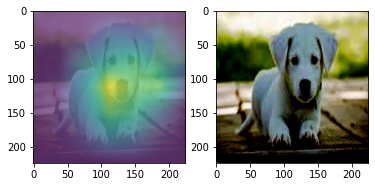

In [0]:
plt.subplot(1,2,1);
plt.imshow(cam , alpha=0.8);
plt.imshow(x[0] , alpha=0.2);
plt.subplot(1,2,2);
plt.imshow(x[0]);
print(detected[0][1])